In [1]:
import numpy as np
import numpy

import matplotlib.pyplot as plt
import h5py
%matplotlib inline


import csiborgtools

%load_ext autoreload
%autoreload 2

In [2]:
field_reader = csiborgtools.read.CSiBORG1Field(7444)
density = field_reader.density_field("SPH", 1024)

In [54]:
sky_pos = np.array([[30, 20], [20, 30]]).reshape(2, -1)

boxsize = 677.7
rmax = 100
dr = 0.01
smooth_scales = [0., 2.0]



In [55]:
rdist, finterp = csiborgtools.field.evaluate_los(density, density, sky_pos=sky_pos, boxsize=boxsize,
                                rmax=rmax, dr=dr, verbose=True, smooth_scales=smooth_scales)

Smoothing and interpolating field 1/2:  50%|█████     | 1/2 [01:19<01:19, 79.48s/it]

Smoothing....


Smoothing and interpolating field 2/2:  50%|█████     | 1/2 [00:28<00:28, 28.69s/it]

Smoothing....


Smoothing and interpolating field 2/2: 100%|██████████| 2/2 [04:22<00:00, 131.10s/it]


In [58]:
finterp[0].shape

(2, 10000, 2)

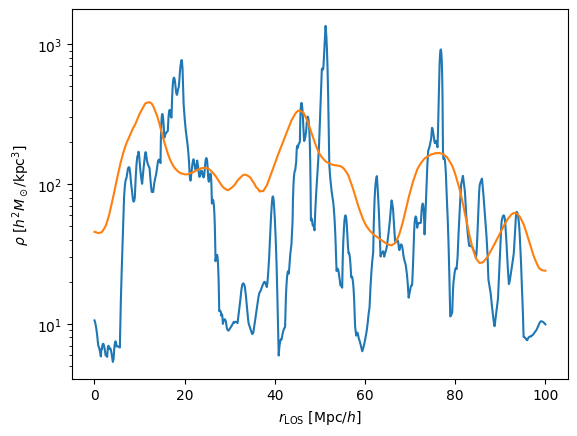

In [62]:
plt.figure()
plt.plot(rdist, finterp[0][0, :, 0])
plt.plot(rdist, finterp[0][0, :, 1])
# plt.plot(rdist, finterp[0][1, :, 1])
# plt.plot(rdist, finterp[0][1])
plt.yscale("log")
plt.xlabel(r"$r_{\rm LOS} ~ [\mathrm{Mpc} / h]$")
plt.ylabel(r"$\rho ~ [h^2 M_\odot / \mathrm{kpc}^3]$")

# plt.savefig("../plots/los_density.png")
plt.show()

In [66]:
with h5py.File("/mnt/extraspace/rstiskalek/catalogs/PV_Supranta/A2.h5", 'r') as f:
    print(f.keys())
    print(f["RA"][:])

<KeysViewHDF5 ['DEC', 'RA', 'e_rhMpc', 'r_hMpc', 'z_obs']>
[257.913777   153.92777016 179.31705342 191.86833286 281.66408049
 288.50201589 174.50610479 216.60269476 108.90996236 309.42214917
  16.81750993 269.4221259  238.14579579 121.27993484 203.84909417
 188.47592843 185.27476324 106.4123163  133.64692979  37.85860654
 146.02174412 129.61819338  84.1608868  334.00415153  38.45407476
  22.82045861 263.94764257 211.6610223  240.72609721 140.4400568
 165.4075435  241.85718797 126.90418905 275.68210609  24.32272137
 339.92326     15.87872813 103.26137093   3.62135198 348.62844138
  11.99957619 326.85679608 268.67725928 179.16012979 192.18390097
 191.36167164 101.85702889 111.72088801 355.05147665   6.32760332
 212.48967159 154.29785936 191.7514308  144.21308917 199.48295574
 207.74625324  94.07749024  27.10552055   9.08016256 145.25330055
  71.2998542  147.69263532  41.4626546  341.35398351 200.37903246
 187.7966961  252.43764592 187.78615058 188.51866596 161.78216462
 202.77460985 344.

In [28]:
finterp[0], finterp[1]

(array([  10.583365 ,    6.7742605,    7.1643467,    6.8513064,
           5.5301476,    6.9267087,   22.147158 ,  108.51967  ,
         112.481346 ,   88.93071  ,  145.0881   ,  141.2615   ,
         134.5087   ,   87.61397  ,  139.79611  ,  315.07483  ,
         234.62367  ,  301.84012  ,  484.01865  ,  663.8185   ,
         293.2296   ,  136.89264  ,  147.65718  ,  130.9273   ,
         116.33771  ,  143.74536  ,   80.08072  ,   30.173855 ,
          12.165639 ,   10.68441  ,    9.221353 ,   10.211646 ,
          11.992005 ,   19.4537   ,   11.251454 ,    8.464169 ,
          13.099285 ,   17.883732 ,   19.20988  ,   46.738792 ,
          55.239193 ,    6.841834 ,    9.18582  ,   23.706173 ,
          74.723434 ,  187.2956   ,  369.05817  ,  253.03062  ,
          55.191418 ,   68.85495  ,  289.00592  ,  969.0986   ,
         180.4563   ,   70.97476  ,   24.608627 ,   24.743225 ,
          47.642834 ,   21.767788 ,    8.428687 ,    7.14018  ,
           7.660934 ,   13.2114   ,   62

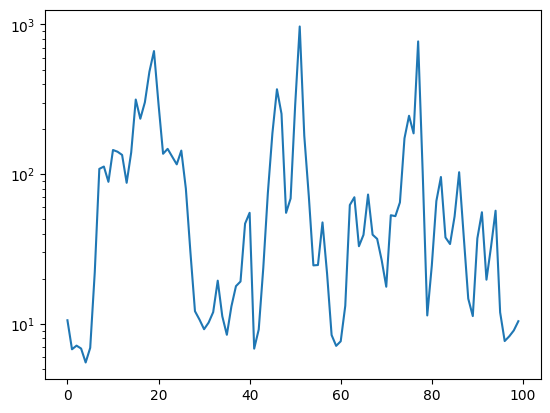

In [24]:
plt.figure()
plt.plot(rdist, finterp[:100])
plt.yscale("log")
plt.show()